<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe30338-2021](https://jckantor.github.io/cbe30338-2021);
content is available [on Github](https://github.com/jckantor/cbe30338-2021.git).*


<!--NAVIGATION-->
< [3.0 Feedback Control](https://jckantor.github.io/cbe30338-2021/03.00-Feedback-Control.html) | [Contents](toc.html) | [None](https://jckantor.github.io/cbe30338-2021/04.00-Process-Analytics.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/03.01-Case-Study-Thermal-Cycling-PCR.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/03.01-Case-Study-Thermal-Cycling-PCR.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 3.1 Case Study: Thermal Cycling for PCR

## 3.1.1 Pre-reads

* [Notre Dame Center for Advanced Diagnostics and Therapeutics](https://advanceddiagnostics.nd.edu/assets/382241/coronavirus_test_faq.pdf)
* [miniPCR Thermal Cycler]( https://www.youtube.com/watch?time_continue=1&v=ALNZJhUOSMs&feature=emb_logo)

## 3.1.2 Coronavirus Diagnostics

COVID-19 is a respiratory tract infection by a specific species of coronavirus called SARS-CoV-2. Coronaviruses have a protein envelope characterized by club-shaped protrusions that give the impression of a corona when viewed with an electron microscope.

<p href="https://commons.wikimedia.org/wiki/File:Novel_Coronavirus_SARS-CoV-2.jpg#/media/File:Novel_Coronavirus_SARS-CoV-2.jpg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Novel_Coronavirus_SARS-CoV-2.jpg/1200px-Novel_Coronavirus_SARS-CoV-2.jpg" alt="Electron micrograph of SARS-CoV-2 virions with visible coronae"></a><br>By NIAID - <a rel="nofollow" class="external free" href="https://www.flickr.com/photos/niaid/49534865371/">https://www.flickr.com/photos/niaid/49534865371/</a>, <a href="https://creativecommons.org/licenses/by/2.0" title="Creative Commons Attribution 2.0">CC BY 2.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=87484997">Link</p>

Coronaviruses have a relatively large genome comprised of a single strand of positive-sense RNA.

<p href="https://commons.wikimedia.org/wiki/File:Vaccines-08-00587-g002-A.png"><img width="512" alt="Vaccines-08-00587-g002-A" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Vaccines-08-00587-g002-A.png/512px-Vaccines-08-00587-g002-A.png"></p>

[https://commons.wikimedia.org/wiki/File:Vaccines-08-00587-g002-A.png](https://commons.wikimedia.org/wiki/File:Vaccines-08-00587-g002-A.png)

 A coronavirus test begins with a swab of throat or nose. The swab is rinsed with a buffer solution to capture the host DNA and RNA, and the RNA of any virus that may be present. RNA is isolated from the solution and converted to DNA using a reverse transcriptase enzyme. The amount of DNA collected in this fashion is too small to analyze by conventional methods. So the first step in a diagnostic protocol is to amplify the amount of DNA using the polymerase chain reaction.

## 3.1.3 Polymerase Chain Reaction (PCR)

The polymerase chain reaction (PCR) is a technique used in molecular biology to take amplify small samples of DNA into quantities large enough to be detected using conventional analytical methods. The technique is described in the following videos.

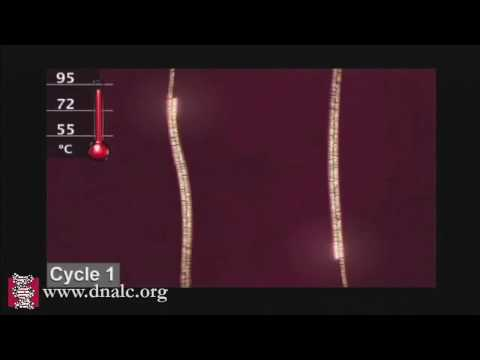

In [127]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('2KoLnIwoZKU')

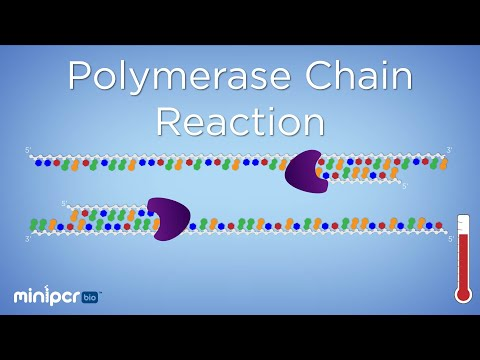

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('c07_5BfIDTw')

PCR provides an exponential amplification of target DNA sequences to concentrations that can be detected by conventional analytical techniques.

<img width="800" alt="Polymerase chain reaction-en" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Polymerase_chain_reaction-en.svg/800px-Polymerase_chain_reaction-en.svg.png">

[https://commons.wikimedia.org/wiki/File:Polymerase_chain_reaction-en.svg](https://commons.wikimedia.org/wiki/File:Polymerase_chain_reaction-en.svg)

The main part of PCR consists of three steps that are repeated 20 or more times:

1. Denaturation at 94-96 $^\circ$C. At this step, DNA 'breaks apart', splitting from a double helix into single strands
2. Annealing at temperatures between 50 and 68 $^\circ$C. Primers bond to the single-stranded DNA.  The exact temperature depends on the length and content of the target sequence.
3. Extension at ca. 72 $^\circ$C. Polymerase compliments the DNA, synthesizing strands that are of the target sequence

## 3.1.4 Examples of low-cost and open-source PCR thermal cyclers

PCR thermal cyclers are a common piece of hardware in biology and medical testing laboratories. These devices automate the thermal cycle operation by providing users with convenient means of specifying parameters for a particular PCR test, and then executing that cycle to some specified degree of precision. Most commercial devices perform multiple from a few to several hundres tests at a time.

![](http://media.biocompare.com/m/37/Product/239450-400x300.jpg)

There are also examples of low-cost and open-source designs of PCR thermal cyclers intended for education, field work, and other situations where there is a benefit to keeping costs very low.

* [miniPCR Thermal Cycler]( https://www.youtube.com/watch?time_continue=1&v=ALNZJhUOSMs&feature=emb_logo)
* https://www.instructables.com/id/Arduino-PCR-thermal-cycler-for-under-85/


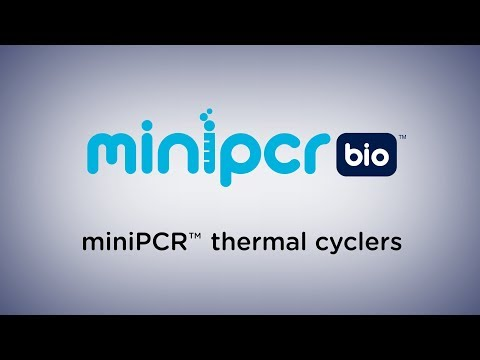

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ALNZJhUOSMs')

## 3.1.5 The Challenge: Prototyping a Control System for a PCR Thermal Cycler

With two heater/sensor assemblies, the temperature Control Lab provides a platform for developing and testing control strategies for a PCR thermal cycler.

<img width="500"  src="http://apmonitor.com/pdc/uploads/Main/tclab_front.jpg">

There are some differences. PCR thermal cyclers generally include thermoelectric coolers rather than rely solely on convective cooling, and generally have more "control authority" in the form of larger power inputs. So we will be limited in our ability to mimic higher performance devices. But for the purposes of prototyping, the Temperature Contol Lab offers an excellent platform for initial prototype.

## 3.1.6 What will this project entail?

![](figures/B.01-FeedbackControlDiagram.png)

Consider the use of the Temperature Control Lab as a prototyping device for a PCR Thermal Cycling device. Discuss each of the following aspects of the control loop:

1. What are the control variables (CV)?
2. What are the measurement process variables (PV)? Are they different than the CV's?
3. What are the setpoints (SP)?
4. What are the manipulated variables (MV)?
5. What are some examples of disturbance variables (DV)? (There are many possibilities.)
6. What diagnostics would be useful in this application?

In qualitative terms, describe:

1. Why is feedback control important for this application?  
2. Is there a role for feedforward control?
3. How will we deal with the fact the CV's are not the same as the PV's?
4. Describe some possible control algorithms that would allow you to track a setpoint.


## 3.1.7 Establishing Setpoints: PCR Thermal Cycler Protocols

### 3.1.7.1 Typical protocols

Here's an example of a PCR thermal cycler protocol:

* Activation of polymerase: 95°C, 15 min
* Thermal cycling: 30 cycles
    * Denaturation: 94°C, 20 s
    * Annealing: 60°C, 20 s
    * Elongation: 72°C, 30 s
* Extension: 72°C, 10 min
* Storage: 4°C, as necessary

The details of these protocols vary depending on the nature of the test, the reagents used, and the type of detection that will be employed. In real-time PCR, the number of cycling steps will end once a positive result is obtained.

### 3.1.7.2 Representing protocols in Python

In [120]:
import numpy as np

# number of cycles
n_cycles = 30

# enter steps in the protocol as a list of (time, temperature) pairs
activation = [(900, 95)]
cycling = [(20, 94), (20, 60), (30, 72)]*n_cycles
extension = [(600, 72)]

# concatenate into a list of (time, temperature) intervals
protocol = np.concatenate([activation, cycling, extension])
protocol

array([[900,  95],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,  94],
       [ 20,  60],
       [ 30,  72],
       [ 20,

### 3.1.7.3 Converting to ramp, soak specifications

For each step in a given protocol, the thermal cycler must first "ramp" to that temperature, the "soak" at the specified temperature for the specified period of time.

In [121]:
# list the soak intervals
for time, temp in protocol:
    print(f" soak at {temp} deg C for {time} seconds")

 soak at 95 deg C for 900 seconds
 soak at 94 deg C for 20 seconds
 soak at 60 deg C for 20 seconds
 soak at 72 deg C for 30 seconds
 soak at 94 deg C for 20 seconds
 soak at 60 deg C for 20 seconds
 soak at 72 deg C for 30 seconds
 soak at 94 deg C for 20 seconds
 soak at 60 deg C for 20 seconds
 soak at 72 deg C for 30 seconds
 soak at 94 deg C for 20 seconds
 soak at 60 deg C for 20 seconds
 soak at 72 deg C for 30 seconds
 soak at 94 deg C for 20 seconds
 soak at 60 deg C for 20 seconds
 soak at 72 deg C for 30 seconds
 soak at 94 deg C for 20 seconds
 soak at 60 deg C for 20 seconds
 soak at 72 deg C for 30 seconds
 soak at 94 deg C for 20 seconds
 soak at 60 deg C for 20 seconds
 soak at 72 deg C for 30 seconds
 soak at 94 deg C for 20 seconds
 soak at 60 deg C for 20 seconds
 soak at 72 deg C for 30 seconds
 soak at 94 deg C for 20 seconds
 soak at 60 deg C for 20 seconds
 soak at 72 deg C for 30 seconds
 soak at 94 deg C for 20 seconds
 soak at 60 deg C for 20 seconds
 soak at 

In [122]:
# each soak period is preceeded by a ramp
for time, temp in protocol:
    print(f" ramp to {temp}")
    print(f" soak at {temp} deg C for {time} seconds")
    print()

 ramp to 95
 soak at 95 deg C for 900 seconds

 ramp to 94
 soak at 94 deg C for 20 seconds

 ramp to 60
 soak at 60 deg C for 20 seconds

 ramp to 72
 soak at 72 deg C for 30 seconds

 ramp to 94
 soak at 94 deg C for 20 seconds

 ramp to 60
 soak at 60 deg C for 20 seconds

 ramp to 72
 soak at 72 deg C for 30 seconds

 ramp to 94
 soak at 94 deg C for 20 seconds

 ramp to 60
 soak at 60 deg C for 20 seconds

 ramp to 72
 soak at 72 deg C for 30 seconds

 ramp to 94
 soak at 94 deg C for 20 seconds

 ramp to 60
 soak at 60 deg C for 20 seconds

 ramp to 72
 soak at 72 deg C for 30 seconds

 ramp to 94
 soak at 94 deg C for 20 seconds

 ramp to 60
 soak at 60 deg C for 20 seconds

 ramp to 72
 soak at 72 deg C for 30 seconds

 ramp to 94
 soak at 94 deg C for 20 seconds

 ramp to 60
 soak at 60 deg C for 20 seconds

 ramp to 72
 soak at 72 deg C for 30 seconds

 ramp to 94
 soak at 94 deg C for 20 seconds

 ramp to 60
 soak at 60 deg C for 20 seconds

 ramp to 72
 soak at 72 deg C for

In [123]:
# add varibles to track current time and temperature
# ramp period is determined by a "ramp_rate"

ramp_rate = 2.5 # deg/sec
time_now = 0.0
temp_now = 21.0

for time, temp in protocol:
    print(f" at time {time_now} begin ramp from {temp_now}C to {temp}C")
    time_now += np.abs((temp - temp_now)/ramp_rate) 
    temp_now = temp
    print(f" at time {time_now} begin soak at {temp}C for {time} seconds")
    time_now += time
    print()

 at time 0.0 begin ramp from 21.0C to 95C
 at time 29.6 begin soak at 95C for 900 seconds

 at time 929.6 begin ramp from 95C to 94C
 at time 930.0 begin soak at 94C for 20 seconds

 at time 950.0 begin ramp from 94C to 60C
 at time 963.6 begin soak at 60C for 20 seconds

 at time 983.6 begin ramp from 60C to 72C
 at time 988.4 begin soak at 72C for 30 seconds

 at time 1018.4 begin ramp from 72C to 94C
 at time 1027.2 begin soak at 94C for 20 seconds

 at time 1047.2 begin ramp from 94C to 60C
 at time 1060.8 begin soak at 60C for 20 seconds

 at time 1080.8 begin ramp from 60C to 72C
 at time 1085.6 begin soak at 72C for 30 seconds

 at time 1115.6 begin ramp from 72C to 94C
 at time 1124.3999999999999 begin soak at 94C for 20 seconds

 at time 1144.3999999999999 begin ramp from 94C to 60C
 at time 1157.9999999999998 begin soak at 60C for 20 seconds

 at time 1177.9999999999998 begin ramp from 60C to 72C
 at time 1182.7999999999997 begin soak at 72C for 30 seconds

 at time 1212.7999

In [124]:
# store the data in a list of time, temperature pairs marking the end of each period

ramp_rate = 0.5 # deg/sec
time_now = 0.0
temp_now = 21.0
SP_data = [[time_now, temp_now]]

for time, temp in protocol:
    # ramp
    time_now += np.abs((temp - temp_now)/ramp_rate) 
    temp_now = temp
    SP_data.append([time_now, temp_now])

    # soad
    time_now += time
    temp_now = temp
    SP_data.append([time_now, temp_now])

SP_data

[[0.0, 21.0],
 [148.0, 95],
 [1048.0, 95],
 [1050.0, 94],
 [1070.0, 94],
 [1138.0, 60],
 [1158.0, 60],
 [1182.0, 72],
 [1212.0, 72],
 [1256.0, 94],
 [1276.0, 94],
 [1344.0, 60],
 [1364.0, 60],
 [1388.0, 72],
 [1418.0, 72],
 [1462.0, 94],
 [1482.0, 94],
 [1550.0, 60],
 [1570.0, 60],
 [1594.0, 72],
 [1624.0, 72],
 [1668.0, 94],
 [1688.0, 94],
 [1756.0, 60],
 [1776.0, 60],
 [1800.0, 72],
 [1830.0, 72],
 [1874.0, 94],
 [1894.0, 94],
 [1962.0, 60],
 [1982.0, 60],
 [2006.0, 72],
 [2036.0, 72],
 [2080.0, 94],
 [2100.0, 94],
 [2168.0, 60],
 [2188.0, 60],
 [2212.0, 72],
 [2242.0, 72],
 [2286.0, 94],
 [2306.0, 94],
 [2374.0, 60],
 [2394.0, 60],
 [2418.0, 72],
 [2448.0, 72],
 [2492.0, 94],
 [2512.0, 94],
 [2580.0, 60],
 [2600.0, 60],
 [2624.0, 72],
 [2654.0, 72],
 [2698.0, 94],
 [2718.0, 94],
 [2786.0, 60],
 [2806.0, 60],
 [2830.0, 72],
 [2860.0, 72],
 [2904.0, 94],
 [2924.0, 94],
 [2992.0, 60],
 [3012.0, 60],
 [3036.0, 72],
 [3066.0, 72],
 [3110.0, 94],
 [3130.0, 94],
 [3198.0, 60],
 [3218.0, 60

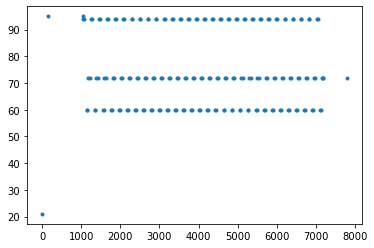

In [125]:
%matplotlib inline

# convert to numpy array for plotting
SP_data = np.array(SP_data)
fig, ax = plt.subplots(1, 1)
ax.plot(SP_data[:,0], SP_data[:,1], '.')

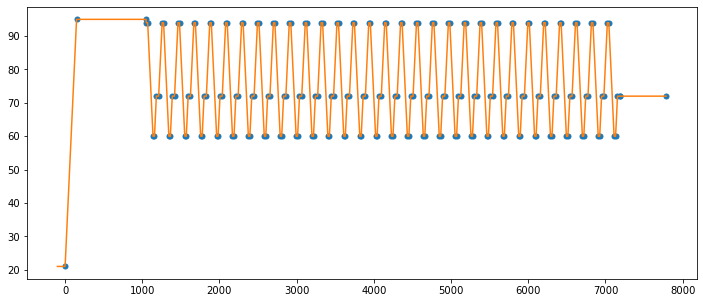

In [126]:
# create function to interpolate

def SP(t):
    return np.interp(t, SP_data[:,0], SP_data[:, 1])

t = np.linspace(-100, max(SP_data[:,0]), 2000)
fig, ax = plt.subplots(1, 1, figsize=(12,5))
ax.plot(SP_data[:,0], SP_data[:,1], '.', ms=10)
ax.plot(t, SP(t))

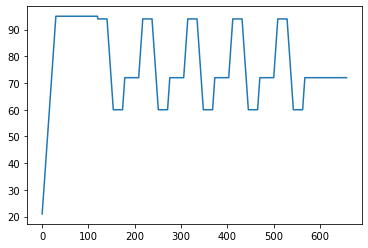

In [68]:
time_now = 0
temp_now = 21.0
ramp_rate = 2.5    # deg/sec

SP = [[time_now, temp_now]]

for time, temp in zip(time_protocol, temp_protocol):
    
    time_now += np.abs(temp - temp_now)/ramp_rate
    temp_now = temp
    SP.append([time_now, temp_now])
    
    time_now += time
    temp_now = temp
    SP.append([time_now, temp_now])
    
SP = np.array(SP)
plt.plot(SP[:,0], SP[:,1])

<!--NAVIGATION-->
< [3.0 Feedback Control](https://jckantor.github.io/cbe30338-2021/03.00-Feedback-Control.html) | [Contents](toc.html) | [None](https://jckantor.github.io/cbe30338-2021/04.00-Process-Analytics.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/03.01-Case-Study-Thermal-Cycling-PCR.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/03.01-Case-Study-Thermal-Cycling-PCR.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>